In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch import Tensor

In [2]:
path = 'C:/Users/amin7/Downloads/quick.csv'
quick = pd.read_csv(path)

In [3]:
quick.head(5)

,ManualR,ManualS,Auto,ProYear,Mileage,Damage,minPrice,MaxPrice,Price
0,1.0,0.0,0.0,1402.0,0.0,1.0,336.0,315.0,325.5
1,0.0,0.0,1.0,1397.0,0.0,2.0,306.0,321.0,313.5
2,0.0,1.0,0.0,1402.0,0.0,2.0,318.0,333.0,325.5
3,0.0,1.0,0.0,1402.0,0.0,1.0,318.0,333.0,325.5
4,1.0,0.0,0.0,1401.0,0.0,1.0,326.0,341.0,333.5


In [4]:
mm = MinMaxScaler()
quick = pd.DataFrame(mm.fit_transform(quick.drop(['minPrice', 'MaxPrice'], axis = 1),), columns = ['ManualR', 'ManualS',
    'Auto', 'ProYear', 'Mileage', 'Damage','Price'])

In [5]:
quick = quick.head(162)
quick

,ManualR,ManualS,Auto,ProYear,Mileage,Damage,Price
0,1.0,0.0,0.0,1.0,0.00,0.0,0.640394
1,0.0,0.0,1.0,0.0,0.00,0.2,0.581281
2,0.0,1.0,0.0,1.0,0.00,0.2,0.640394
3,0.0,1.0,0.0,1.0,0.00,0.0,0.640394
4,1.0,0.0,0.0,0.8,0.00,0.0,0.679803
...,...,...,...,...,...,...,...
157,0.0,0.0,1.0,0.0,0.20,0.4,0.551724
158,1.0,0.0,0.0,0.8,0.20,0.2,0.635468
159,0.0,0.0,1.0,0.8,0.20,0.0,0.857143
160,1.0,0.0,0.0,0.4,0.24,0.0,0.544335


In [6]:
x = quick.iloc[:, :6].values  
y = quick.iloc[:, -1].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state = 0)

In [8]:
# Define the model
model = nn.Sequential(
    nn.Linear(6, 18),
    nn.ReLU(),
    nn.Linear(18, 9),
    nn.ReLU(),
    nn.Linear(9, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

In [9]:
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [10]:
print ("Shape of Train Data:", x_train.shape)
print ("Shape of Test Data:", x_test.shape)

Shape of Train Data: (137, 6)
Shape of Test Data: (25, 6)


In [11]:
# Convert to 2D PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [12]:
n_epochs = 400   # number of epochs to run
batch_size = 30  # size of each batch
batch_start = torch.arange(0, len(x_train), batch_size)

In [13]:
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

In [14]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            x_batch = x_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(x_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
        

MSE: 0.00
RMSE: 0.02


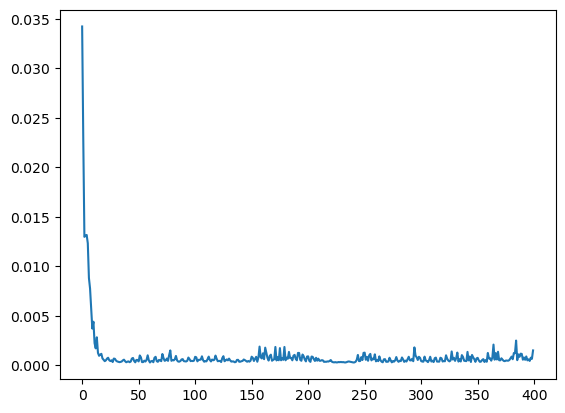

In [15]:
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [39]:
quickDenormalized = pd.read_csv(path)
def getReadablePrice(price):
    return price * (quickDenormalized["Price"].max() - quickDenormalized["Price"].min()) + quickDenormalized["Price"].min()

In [45]:
# define a tensor 'x'
#ManualR, ManualS, Automatic, ModeYear, Mileage, BodyDamage
x = torch.tensor([[0.0, 0.0, 1.0 ,0.9 ,0.0 , 0.0]])
# predict the value with forward function
y_pred = model(x)
# show the result
print("Prediction: ", getReadablePrice(float(y_pred)))

Prediction:  385.48802119493484
